In [1]:
import os 
import pandas as pd
import tqdm
import numpy as np


1. - [x] Завантажте датасет, пiдготуйте його для входу в нейронну мережу.
2. - [x] Побудуйте щiльну нейронну мережу для класифiкацiї. Проведiть аналiз отриманих результатiв. Чи має мiсце перенавчання?
3. - [x] Побудуйте згорткову нейронну мережу. Проаналiзуйте чи змiнився результат.З’ясуйте чи мало мiсце перенавчання.
4. - [x] Спробуйте покращити результати використавши рiзнi налаштування (рiзнi оптимiзатори, learning rate, batch size) а також додавши шари BatchNormalization та Dropout.
5. - [x] Проаналiзуйте процес навчання. Як змiнювалася похибка та точнiсть?
6. - [x] Напишiть висновок у якому Ви опишете отриманi результати.

In [2]:
path = "/kaggle/input/coil100/coil-100/coil-100/"
files = os.listdir(path)

data = []
for i in tqdm.tqdm(files):
    name = i.split('__')
    if len(name)>1:
        number = int(name[0][3:len(name[0])])
        if number <=40 and number >= 21:
            data.append([path+i,number])
df = pd.DataFrame(data,columns=['path','label'])


100%|██████████| 7202/7202 [00:00<00:00, 409325.15it/s]


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.path, df.label, test_size=0.3,random_state=0,stratify= df.label)

In [4]:
from keras.preprocessing.image import load_img,img_to_array
import cv2
X_train=[img_to_array(cv2.imread(file).astype("float")/255.0) for file in tqdm.tqdm(X_train.values)]
X_test=[img_to_array(cv2.imread(file).astype("float")/255.0) for file in tqdm.tqdm(X_test.values)]

100%|██████████| 432/432 [00:02<00:00, 156.93it/s]


In [5]:
import plotly.express as px
from skimage import io

fig = px.imshow(X_train[0])
fig.show()

In [6]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y_train_categorical=encoder.fit_transform(y_train.values.reshape(-1, 1))
y_test_categorical=encoder.transform(y_test.values.reshape(-1, 1))

### Dense neural network

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization

dense_model = Sequential()
dense_model.add(Flatten(input_shape = [128,128,3]))
dense_model.add(Dense(300,activation = 'relu'))
dense_model.add(Dense(100,activation = 'relu'))
dense_model.add(Dense(100,activation = 'relu'))
dense_model.add(Dense(100,activation = 'relu'))
dense_model.add(Dense(20,activation = 'softmax'))

In [8]:
dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 300)               14745900  
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 20)                2020      
                                                                 
Total params: 14798220 (56.45 MB)
Trainable params: 1479

In [9]:
dense_model.compile(loss = 'categorical_crossentropy',
optimizer = 'sgd',
metrics = ['accuracy'])
dense_history = dense_model.fit(np.array(X_train),
                    y_train_categorical,
                    epochs = 10)

Epoch 1/10
32/32 [==============================] - 4s 87ms/step - loss: 2.5945 - accuracy: 0.2520
Epoch 2/10
32/32 [==============================] - 3s 86ms/step - loss: 1.4003 - accuracy: 0.7034
Epoch 3/10
32/32 [==============================] - 3s 78ms/step - loss: 0.7049 - accuracy: 0.8423
Epoch 4/10
32/32 [==============================] - 2s 78ms/step - loss: 0.3258 - accuracy: 0.9355
Epoch 5/10
32/32 [==============================] - 2s 78ms/step - loss: 0.1358 - accuracy: 0.9921
Epoch 6/10
32/32 [==============================] - 2s 77ms/step - loss: 0.0850 - accuracy: 0.9940
Epoch 7/10
32/32 [==============================] - 2s 78ms/step - loss: 0.0600 - accuracy: 0.9990
Epoch 8/10
32/32 [==============================] - 3s 79ms/step - loss: 0.0443 - accuracy: 1.0000
Epoch 9/10
32/32 [==============================] - 3s 79ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 10/10
32/32 [==============================] - 2s 77ms/step - loss: 0.0286 - accuracy: 1.0000


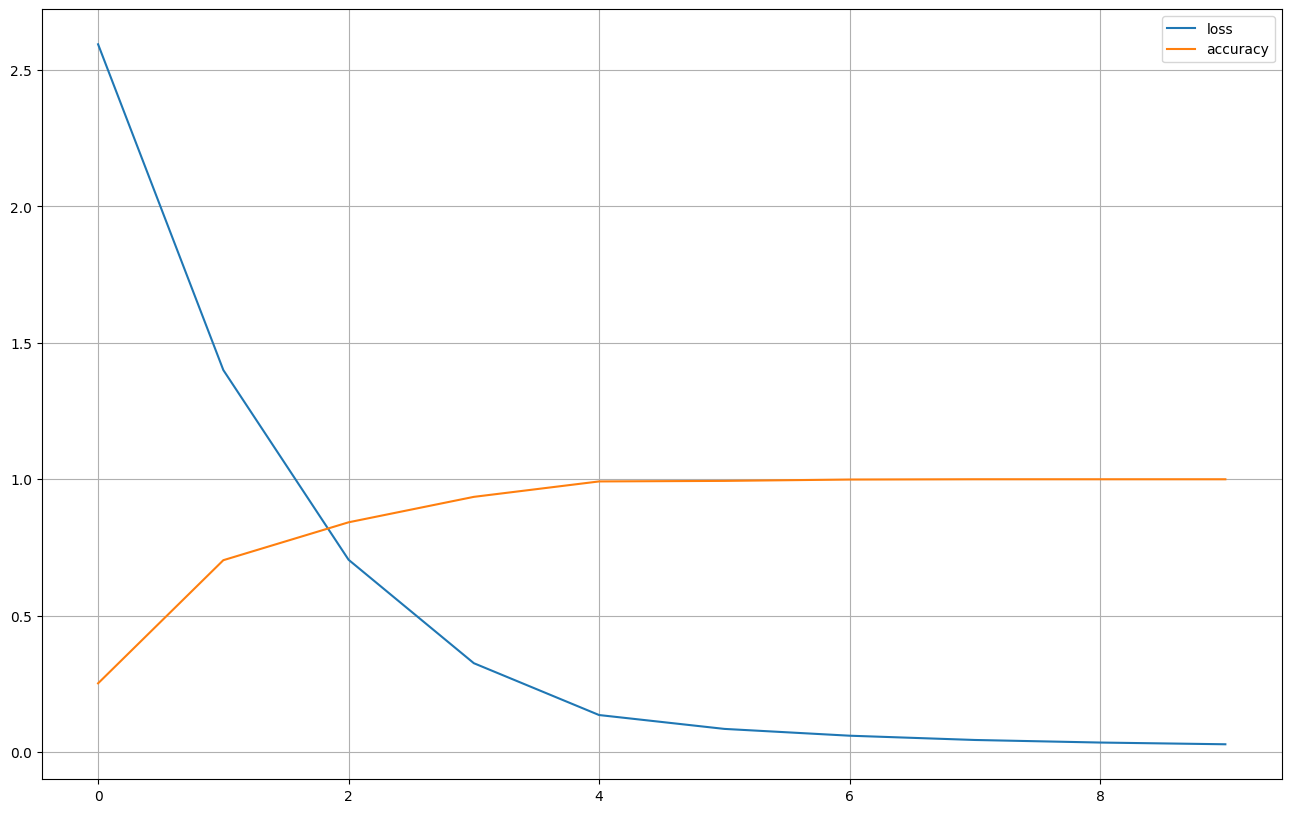

In [10]:
import matplotlib.pyplot as plt
pd.DataFrame(dense_history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.show()

In [11]:
res = dense_model.evaluate(np.array(X_test),y_test_categorical)


14/14 [==============================] - 1s 25ms/step - loss: 0.0314 - accuracy: 1.0000


In [12]:
y_test_categorical[0:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [13]:
dense_model.predict(np.array(X_test))[0:5]

14/14 [==============================] - 0s 23ms/step


array([[5.16662002e-03, 2.74954118e-06, 2.63881462e-04, 8.71845441e-06,
        4.65924648e-04, 1.13584196e-04, 4.33870991e-05, 6.21747575e-04,
        3.14044952e-02, 1.72149862e-06, 2.79540126e-03, 9.56342697e-01,
        2.61368609e-06, 3.51395975e-05, 1.28746860e-05, 5.36449843e-05,
        1.10531365e-03, 2.23353200e-05, 1.51918840e-03, 1.80456354e-05],
       [3.23547632e-04, 7.71973561e-08, 6.62320372e-06, 1.45723538e-06,
        1.64719506e-06, 2.72313230e-07, 2.89866966e-06, 3.67557664e-06,
        1.44271953e-05, 6.69330484e-06, 2.23629922e-05, 2.92877558e-05,
        1.09691382e-06, 4.55297732e-06, 8.12767485e-06, 9.95769978e-01,
        3.65523971e-03, 1.14238601e-05, 6.23040887e-06, 1.30418979e-04],
       [2.44775496e-04, 5.18488057e-04, 3.96307911e-07, 1.75427085e-05,
        2.91751232e-04, 9.92879808e-01, 1.77376678e-05, 6.24148000e-04,
        5.24626812e-04, 4.48759383e-05, 1.34405809e-06, 6.10414572e-05,
        1.16649744e-05, 1.10647496e-04, 3.74628257e-07, 1.7004

 Як ми бачимо наш алгоритм показав чудовий результат. Перенавчання немає так як наша модель показує чудові результати на тренувальних даних.

## CNN

In [14]:
from keras.layers import Conv2D, MaxPooling2D
cnn_model = Sequential()

cnn_model.add(Conv2D(20, (4, 4), input_shape=(128, 128, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
#cnn_model.add(Dense(100,activation = 'relu'))
cnn_model.add(Dense(20,activation = 'softmax'))

cnn_model.compile(loss = 'categorical_crossentropy',
metrics = ['accuracy'])
cnn_history = cnn_model.fit(np.array(X_train),
                    y_train_categorical,
                    epochs = 5)

Epoch 1/5
32/32 [==============================] - 7s 187ms/step - loss: 1.3346 - accuracy: 0.7510
Epoch 2/5
32/32 [==============================] - 6s 184ms/step - loss: 0.1166 - accuracy: 0.9792
Epoch 3/5
32/32 [==============================] - 6s 184ms/step - loss: 0.0438 - accuracy: 0.9901
Epoch 4/5
32/32 [==============================] - 6s 198ms/step - loss: 0.0088 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 6s 181ms/step - loss: 0.0015 - accuracy: 1.0000


In [15]:
cnn_model.evaluate(np.array(X_test),y_test_categorical)

14/14 [==============================] - 1s 48ms/step - loss: 0.0254 - accuracy: 0.9907


[0.02538457326591015, 0.9907407164573669]

Знову все чудово із того, що ми бачимо з accuracy. Наступні моделі напишемо з роздумів виконання завдання лише

In [16]:
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(20, (4, 4), input_shape=(128, 128, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model2.add(BatchNormalization())

cnn_model2.add(Flatten())

cnn_model2.add(Dense(100,activation = 'relu'))
cnn_model2.add(Dense(20,activation = 'softmax'))

cnn_model2.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
cnn_history2 = cnn_model2.fit(np.array(X_train),
                    y_train_categorical,
                    epochs = 5)

Epoch 1/5
32/32 [==============================] - 9s 258ms/step - loss: 2.9203 - accuracy: 0.7887
Epoch 2/5
32/32 [==============================] - 8s 254ms/step - loss: 0.0971 - accuracy: 0.9821
Epoch 3/5
32/32 [==============================] - 9s 274ms/step - loss: 0.1560 - accuracy: 0.9940
Epoch 4/5
32/32 [==============================] - 8s 263ms/step - loss: 0.0106 - accuracy: 0.9970
Epoch 5/5
32/32 [==============================] - 8s 255ms/step - loss: 0.0081 - accuracy: 0.9980


In [17]:
cnn_model2.evaluate(np.array(X_test),y_test_categorical)

14/14 [==============================] - 1s 63ms/step - loss: 0.3174 - accuracy: 0.9190


[0.31736528873443604, 0.9189814925193787]

In [18]:
cnn_model3 = Sequential()

cnn_model3.add(Conv2D(20, (4, 4), input_shape=(128, 128, 3), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(BatchNormalization())

cnn_model3.add(Conv2D(10, (3, 3), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model3.add(Flatten())

cnn_model3.add(Dense(100,activation = 'relu'))
cnn_model3.add(Dense(20,activation = 'softmax'))

cnn_model3.compile(loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
cnn_history3 = cnn_model3.fit(np.array(X_train),
                    y_train_categorical,
                    epochs = 7)

Epoch 1/7
32/32 [==============================] - 10s 278ms/step - loss: 0.6738 - accuracy: 0.8125
Epoch 2/7
32/32 [==============================] - 9s 268ms/step - loss: 0.0593 - accuracy: 0.9851
Epoch 3/7
32/32 [==============================] - 8s 263ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 4/7
32/32 [==============================] - 8s 260ms/step - loss: 7.1619e-04 - accuracy: 1.0000
Epoch 5/7
32/32 [==============================] - 9s 273ms/step - loss: 3.6833e-04 - accuracy: 1.0000
Epoch 6/7
32/32 [==============================] - 8s 261ms/step - loss: 2.7001e-04 - accuracy: 1.0000
Epoch 7/7
32/32 [==============================] - 8s 259ms/step - loss: 1.9158e-04 - accuracy: 1.0000


In [19]:
cnn_model3.evaluate(np.array(X_test),y_test_categorical)

14/14 [==============================] - 1s 60ms/step - loss: 0.1698 - accuracy: 0.9861


[0.16983643174171448, 0.9861111044883728]

Аналізувати те,що сталось тут доволі важко. Оскільки наша модель чудоово впоралось навіть зі звичайною моделлю, то сенсу будувати СNN взагалі не було. А уже після того як ми побудували успішну CNN, то якимось чином модифікувати її не було сенсу. 

Але після того, як ми додали bathch norm модель стала тренуватись гірше, що говорить нам про те, що нормалізувати дані в середині нам не треба. 
Аналогічно з другим фільтровим шаром. Його наявність не сильно покращую модель, що говорить про те, що він нам не треба